In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import scipy.integrate as integrate
from function_library_3 import trim, scaling_law, asteroid_diameter
import os

#================================================================================
# Define nearest neighbor function

def nearest_neighbor(x,file_list):
    norm = np.inf
    for each in file_list: # uses the scaling law to map each basin to its respective data file
        diameter = scaling_law(asteroid_diameter('0_Prime_Data/'+each))
        if np.absolute(diameter-x) < norm:
            norm = np.absolute(diameter-x)
            closest = each
            d = diameter
    print('Mapped to '+ closest,' with diamter {}\n'.format(d))
    return closest


#================================================================================

# Open the user input file with the information from each basin
input_file = open('Basins.txt','r')
basins = []
stage,line = 1,' '
while line[0:3] != 'END':
    line = input_file.readline()
    if line[0:2] == 'LB':
        basins.append(trim(line.split(':')))  

generic_data = []
for filename in os.listdir('0_Prime_Data'):
    if filename.endswith(".dat"):
        generic_data.append(filename)        
        
for each in basins: # map each user defined basin to its closest matching premade data file
    print(each[0]+' with diamter '+str(each[1]))
    in_ = open('0_Prime_Data/{}'.format(nearest_neighbor(each[1],generic_data)),'r+')
    try:
        out_ = open('1_Basin_Data/{}.dat'.format(each[0]),'x')
    except:
        out_ = open('1_Basin_Data/{}.dat'.format(each[0]),'r+')
        out_.truncate(0)
    param = eval(in_.readline())
    new_param = []
    for j in range(7):
        new_param.append(param[j])
    new_param.append([each[2],each[3]])
    new_param.append(each[1]/2)
    out_.write(str(new_param)+'\n')
    for i in range(17):
        out_.write(in_.readline())
    in_.close() ; out_.close()

Moscoviense with diamter 276.0
Mapped to 10km.dat  with diamter 296.01843532182755

Orientale with diamter 294.0
Mapped to 10km.dat  with diamter 296.01843532182755

Bailly with diamter 303.0
Mapped to 10km.dat  with diamter 296.01843532182755

Schrodinger with diamter 312.0
Mapped to 10km.dat  with diamter 296.01843532182755

Planck with diamter 320.0
Mapped to 10km.dat  with diamter 296.01843532182755

Mendeleev with diamter 325.0
Mapped to 10km.dat  with diamter 296.01843532182755

Birkoff with diamter 330.0
Mapped to 10km.dat  with diamter 296.01843532182755

Harkhebi with diamter 337.0
Mapped to 15km.dat  with diamter 374.0075733775118

Nectaris with diamter 340.0
Mapped to 15km.dat  with diamter 374.0075733775118

Poincare with diamter 346.0
Mapped to 15km.dat  with diamter 374.0075733775118

Lorentz with diamter 378.0
Mapped to 15km.dat  with diamter 374.0075733775118

Humorum with diamter 420.0
Mapped to 15km.dat  with diamter 374.0075733775118

Korolev with diamter 437.0
Mappe

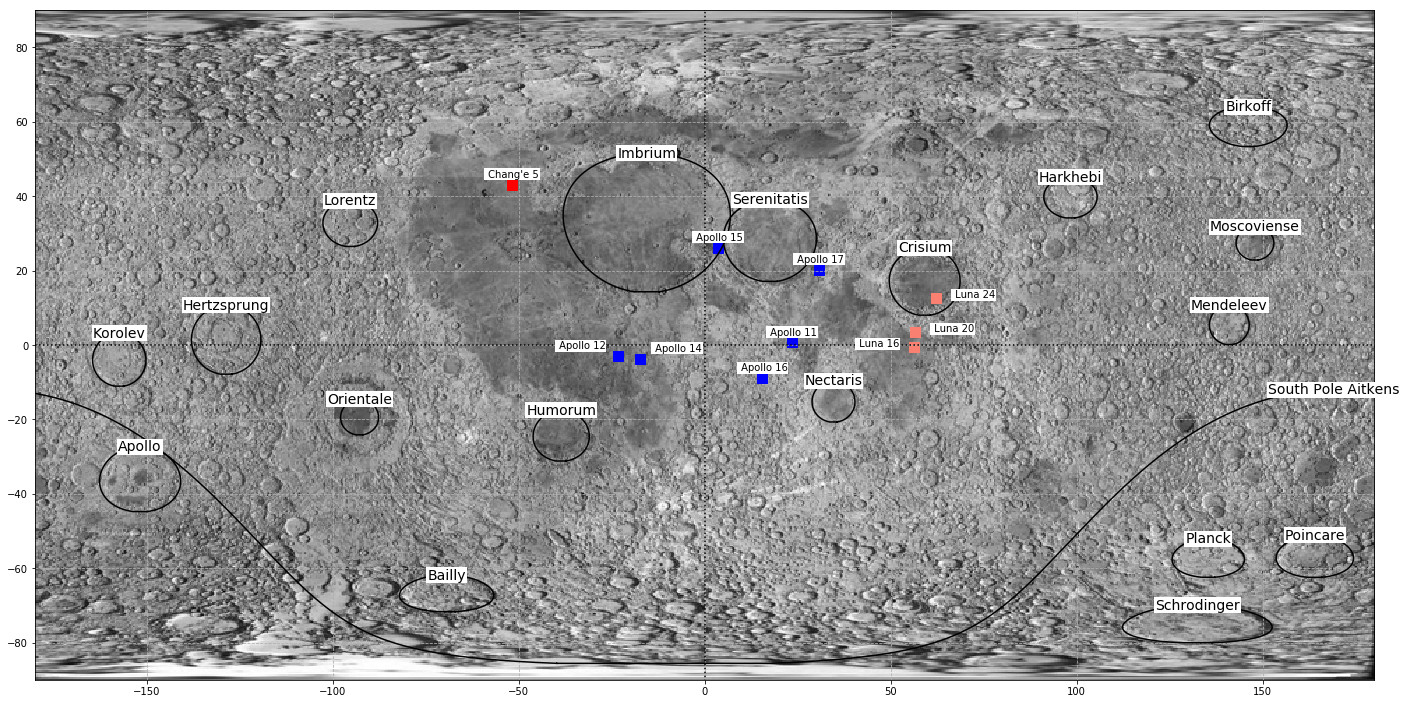

In [2]:
R_planet = 1750

A_sites = {11:[0.67409,23.47298],12:[-3.01381,-23.41930],14:[-3.64544,-17.47139],15:[26.13224,3.63400],16:[-8.97341,15.49859],17:[20.18809,30.77475]}
L_sites = {16:[-.5137,56.3638],20:[3.5333,56.55],24:[12.7145,62.2129]}
C_sites = {5:[43.1,-51.8]}


def solve(R_basin,lam1,lam2):
    numer = 2*(np.sin(R_basin/(2*R_planet)))**2 -1 + np.cos(lam1-lam2) - np.cos(lam1)*np.cos(lam2)
    denom = -np.cos(lam1)*np.cos(lam2)
    return np.arccos(numer/denom)

def process(x_prime,y_prime,phi1):
    xs = [] ; ys = []
    for i in range(len(x_prime)):
        x = (phi1+x_prime[i]+np.pi)%(2*np.pi) - np.pi
        if i!=0 and xs[-1]:
            if xs[-1]*x < 0 and xs[-1] < x:
                xs.append(None) ; ys.append(None)
        xs.append(np.degrees(x))  
        ys.append(np.degrees(y_prime[i]))
    for i in range(len(x_prime)):
        x = (phi1-x_prime[-i-1]+np.pi)%(2*np.pi) - np.pi
        if xs[-1]:
            if xs[-1]*x < 0 and xs[-1] < x:
                xs.append(None) ; ys.append(None)
        xs.append(np.degrees(x))  
        ys.append(np.degrees(y_prime[-i-1]))
    
    del xs[0] ; del ys[0]
    del xs[-1] ; del ys[-1]    
    xs.append(xs[0]) ; ys.append(ys[0])
    
    return xs,ys
    
fig = plt.figure(figsize=(24,24),facecolor='white')
ax = fig.add_subplot(111,aspect='equal')

img = plt.imread("Mercator.png")
ax.imshow(img, extent=[-180, 180, -90, 90])#, alpha=.5)

ax.plot([0,0], [-180,180], ls=':', color='black')
ax.plot([-180,180], [0,0], ls=':', color='black')

for each in A_sites.keys():
    fix = 0
    if each == 14:
        fix = 10
    if each == 12:
        fix = -10
    ax.text(A_sites[each][1]+fix,A_sites[each][0]+2,' Apollo '+str(each),fontsize=10, ha='center', bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
    ax.scatter(A_sites[each][1],A_sites[each][0],marker='s',s=100,c='blue')
    
for each in L_sites.keys():
    fix = 10
    if each == 16:
        fix *= -1
    ax.text(L_sites[each][1]+fix,L_sites[each][0],' Luna '+str(each),fontsize=10, ha='center', bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
    ax.scatter(L_sites[each][1],L_sites[each][0],marker='s',s=100,c='salmon')
    
for each in C_sites.keys():
    ax.text(C_sites[each][1],C_sites[each][0]+2," Chang'e "+str(each),fontsize=10, ha='center', bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
    ax.scatter(C_sites[each][1],C_sites[each][0],marker='s',s=100,c='red')

def transform(x,lam_min,lam_max):
    k   = 5
    L   = lam_max - lam_min
    return L * ( 1 + np.exp(-k*x) )**-1 + lam_min
    
for each in basins:
    name = each[0]
    if name == 'SPoleAitkens':
        name = 'South Pole Aitkens'
    R_basin = each[1]/2
    lam1 = np.radians(each[2])
    phi1 = np.radians(each[3])
        
    lam_max = lam1 + R_basin/R_planet
    if lam_max > np.pi/2:
        lam_max = np.pi - lam_max
    
    lam_min = lam1 - R_basin/R_planet
    if lam_min < -np.pi/2:
        lam_min = -np.pi - lam_min
        
    latitudes = transform(np.linspace(-1,1,1000),lam_min,lam_max)
    
    ax.text(np.degrees(phi1),np.degrees(lam_max),name,fontsize=14, bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},ha='center', va='center')
   
    x_prime = [] ; y_prime = []
    for lam2 in latitudes:
        lat  = lam2
        D_long = solve(R_basin,lam1,lam2)
        x_prime.append(D_long)
        y_prime.append(lat)
    
    xs,ys = process(x_prime,y_prime,phi1)
    
    ax.plot(xs,ys,c='black')
    

ax.grid(True, ls='--', zorder=-15);
ax.set_xlim(-180,180);
ax.set_ylim(-90,90);